# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [337]:
import pandas as pd

shark_url = "https://raw.githubusercontent.com/ds4e/wrangling/main/data/GSAF5.xls"
shark = pd.read_excel(shark_url)

shark.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [338]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()


In [339]:
import pandas as pd

meta = pd.read_csv("data/metabric.csv")
meta.head()


,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [340]:
# Check column names to find survival status
meta.columns


Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
       'Chemotherapy', 'Hormone Therapy', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index',
       'Overall Survival (Months)', 'Overall Survival Status', 'Radio Therapy',
       'TMB (nonsynonymous)', 'Tumor Size', 'Tumor Stage'],
      dtype='object')

In [341]:
# Turn survival status into a binary dummy variable (robust version)
meta["Overall_Survival_dummy"] = (
    meta["Overall Survival Status"]
    .astype(str)
    .str.upper()
    .apply(
        lambda x: 0 if "DECEASED" in x else
                  1 if "LIVING" in x else
                  None
    )
)

# Check results
meta["Overall_Survival_dummy"].value_counts(dropna=False)


,count
Overall_Survival_dummy,
0,768
1,575


I converted the Overall Survival Status variable into a binary dummy variable,
where 0 indicates deceased patients and 1 indicates living patients.
Because the original values included numeric prefixes (e.g., "1:DECEASED"),
string-based matching was used to correctly map survival status.


In [342]:
import pandas as pd

airbnb = pd.read_csv(
    "data/airbnb_NYC.csv",
    encoding="latin1"
)

airbnb.head()
airbnb["Review Scores Rating"].isna().sum()



np.int64(8323)

In [343]:
# Compute median of non-missing review scores
median_rating = airbnb["Review Scores Rating"].median()
median_rating


94.0

In [344]:
# Impute missing values with the median
airbnb["Review_Scores_Rating_imputed"] = (
    airbnb["Review Scores Rating"]
    .fillna(median_rating)
)


In [345]:
# Check that there are no missing values left
airbnb["Review_Scores_Rating_imputed"].isna().sum()


np.int64(0)

The Review Scores Rating variable contains 8,323 missing values.
I created a new variable where the missing values were imputed using the median
of the non-missing observations. This approach may introduce bias because it
reduces variability and assumes that listings with missing reviews are similar
to the typical listing, which may not be true.


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the shark attack dataset (Excel file)
shark = pd.read_excel("GSAF5.xls")

# Check the data
shark.head()
shark.shape


(7074, 23)

In [347]:
# Drop columns that contain only missing values
shark = shark.dropna(axis=1, how="all")

# Check shape again
shark.shape


(7074, 23)

In this dataset, each observation represents a single reported shark attack incident.
Each row corresponds to one attack, including information such as the year, victim age,
type of attack, and whether the attack was fatal.


In [348]:
# Convert Year to numeric
shark["Year"] = pd.to_numeric(shark["Year"], errors="coerce")

# Look at the range of years
shark["Year"].describe()


,Year
count,7072.000000
mean,1936.004242
std,270.672015
min,0.000000
25%,1948.000000
50%,1987.000000
75%,2010.000000
max,2026.000000


In [349]:
# Filter attacks since 1940
shark_1940 = shark[shark["Year"] >= 1940]


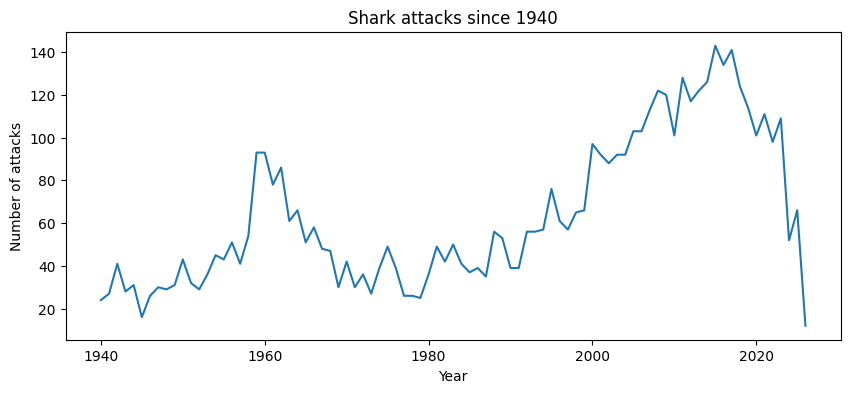

In [350]:
# Plot number of attacks over time
year_counts = shark_1940["Year"].value_counts().sort_index()

year_counts.plot(kind="line", figsize=(10,4))
plt.xlabel("Year")
plt.ylabel("Number of attacks")
plt.title("Shark attacks since 1940")
plt.show()


After restricting the data to shark attacks since 1940, the number of reported attacks
appears to increase over time. This trend likely reflects improved reporting and greater
human interaction with coastal environments rather than an actual increase in shark behavior.


In [351]:
# Look at Age values
shark["Age"].head(10)


,Age
0,13
1,?
2,?
3,39
4,11
5,27
6,12
7,26
8,?
9,56


In [352]:
# Extract numeric ages only
shark["Age_clean"] = (
    shark["Age"]
    .astype(str)
    .str.extract(r"(\d+)", expand=False)
)

# Convert to numeric
shark["Age_clean"] = pd.to_numeric(shark["Age_clean"], errors="coerce")

# Check summary
shark["Age_clean"].describe()


,Age_clean
count,4026.000000
mean,28.153502
std,14.674583
min,1.000000
25%,17.000000
50%,24.000000
75%,37.000000
max,87.000000


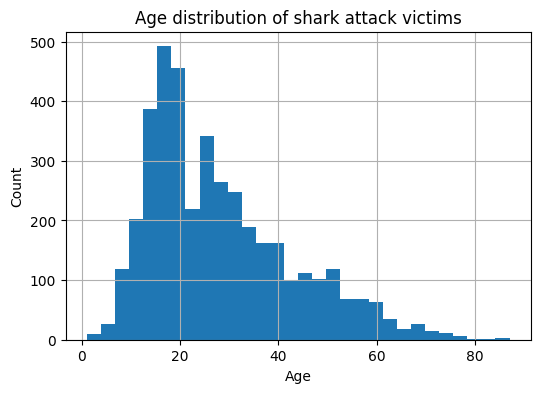

In [353]:
# Plot histogram of victim ages
shark["Age_clean"].hist(bins=30, figsize=(6,4))
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age distribution of shark attack victims")
plt.show()


The Age variable contains many non-numeric values, so I extracted only the numeric part of each entry.
The age distribution shows that most shark attack victims are relatively young, with fewer cases at older ages.


In [354]:
# Check original Type values
shark["Type"].value_counts(dropna=False)


,count
Type,
Unprovoked,5225
Provoked,642
Invalid,552
Watercraft,355
Sea Disaster,242
Questionable,26
NaN,18
Boat,7
Provoked,2


In [355]:
def clean_type(x):
    if pd.isna(x):
        return "Unknown"
    x = str(x).strip().lower()
    if "unprovoked" in x:
        return "Unprovoked"
    if "provoked" in x:
        return "Provoked"
    return "Unknown"

shark["Type_clean"] = shark["Type"].apply(clean_type)
shark["Type_clean"].value_counts(dropna=False)


,count
Type_clean,
Unprovoked,5226
Unknown,1204
Provoked,644


In [356]:
# Check original Fatal values
shark["Fatal Y/N"].value_counts(dropna=False)


,count
Fatal Y/N,
N,4933
Y,1488
NaN,561
UNKNOWN,71
N,7
F,5
M,3
Nq,1
n,1


In [357]:
# Clean Fatal variable
def clean_fatal(x):
    if pd.isna(x):
        return "Unknown"
    x = str(x).strip().upper()
    if x == "Y":
        return "Y"
    if x == "N":
        return "N"
    return "Unknown"

shark["Fatal_clean"] = shark["Fatal Y/N"].apply(clean_fatal)

# Check cleaned values
shark["Fatal_clean"].value_counts()



,count
Fatal_clean,
N,4942
Y,1489
Unknown,643


In [358]:
(shark["Type_clean"] == "Unprovoked").mean()

np.float64(0.7387616624257846)

About 74% of shark attacks are unprovoked.

In [359]:
# Cross-tabulate attack type and fatality
pd.crosstab(shark["Type_clean"], shark["Fatal_clean"], normalize="index")



Fatal_clean,N,Unknown,Y
Type_clean,,,
Provoked,0.953416,0.013975,0.032609
Unknown,0.372924,0.460963,0.166113
Unprovoked,0.742250,0.015117,0.242633


Based on the cross-tabulation, provoked shark attacks appear to be slightly more likely
to result in fatalities compared to unprovoked attacks. However, a large portion of the
data contains unknown values, so this pattern should be interpreted with caution.


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1.This paper is about tidy data, which is a clear and consistent way to organize datasets.
Hadley Wickham explains that a lot of time in data analysis is spent cleaning data, and tidy data helps make that process easier.
The main idea is that when data are tidy, they are easier to analyze, visualize, and model.

2.The tidy data standard is meant to reduce confusion and extra work when working with data.
It gives one common structure so analysts do not have to constantly reformat data for different tools.
This allows people to focus more on understanding the data instead of fixing its structure.

3.“Like families, tidy datasets are all alike but every messy dataset is messy in its own way.”
This means that tidy datasets all follow the same clear rules, so they look similar.
Messy datasets, however, can be messy in many different and unpredictable ways.
“It's usually easy to figure out what are observations and variables, but hard to precisely define them.”
This means that while we often have an intuitive idea of what a variable or observation is,
the exact definition can change depending on context and how the data will be used.

4.Values are the actual data points (numbers or strings).

Variables are collections of values that measure the same thing (like age or income).

Observations are collections of values measured on the same unit (like one person or one day).

5.A dataset is tidy when:

Each variable is in its own column, Each observation is in its own row, Each type of observational unit has its own table

6.The five problems are:

Column headers are values, not variable names, Multiple variables are stored in one column, Variables are stored in both rows and columns, Multiple types of observational units are stored in the same table, One type of observational unit is stored across multiple tables

7.Table 4 is messy because income levels are stored as column headers instead of values.
This makes it harder to analyze the income variable directly.
Melting a dataset means turning columns into rows so that values that belong to one variable are stored in a single column.

8.Table 11 is messy because variables are spread across both rows and columns, and some column names are not actual variables.
Table 12 is tidy because each variable has its own column, and each row represents one clear observation (a single day).
It is “molten” because the data were reshaped from a wide format into a long, tidy format.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [360]:
fg = pd.read_csv("data/ForeignGifts_edu.csv")
fg.head()
fg.shape


(28221, 10)

In [361]:
fg["Foreign Gift Amount"].describe()


,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


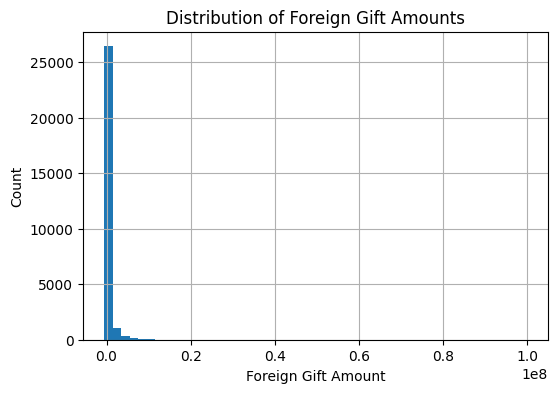

In [362]:
fg["Foreign Gift Amount"].hist(bins=50, figsize=(6,4))
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()


In [363]:
fg["Gift Type"].value_counts()


,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


In [364]:
fg["Gift Type"].value_counts(normalize=True)


,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


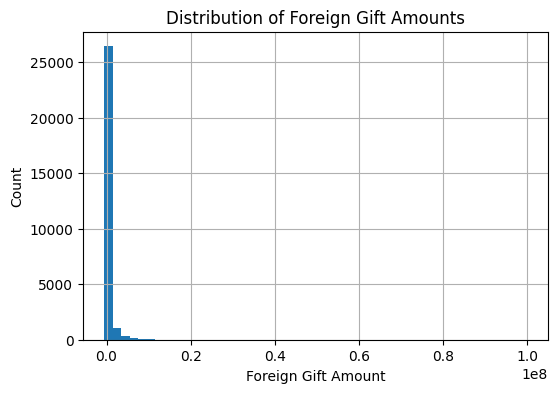

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


In [365]:
fg["Foreign Gift Amount"].hist(bins=50, figsize=(6,4))
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()

fg["Foreign Gift Amount"].describe()


The distribution of foreign gift amounts is highly right-skewed.
Most gifts are relatively small, but there are a few very large gifts that increase the mean.
This suggests that a small number of institutions receive extremely large foreign contributions.

In [366]:
fg["Gift Type"].value_counts(normalize=True)


,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


Contracts make up the largest proportion of foreign gifts, accounting for about 60% of all reported records, while monetary gifts make up a smaller share.
Real estate gifts are extremely rare.
This suggests that most foreign involvement with U.S. universities occurs through formal contractual agreements rather than direct monetary donations.

In [367]:
fg["Country of Giftor"].value_counts().head(15)


,count
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


The top countries by number of gifts are dominated by a small group of countries.
This suggests repeated gifting relationships rather than one-time contributions.

In [368]:
fg.groupby("Country of Giftor")["Foreign Gift Amount"] \
  .sum() \
  .sort_values(ascending=False) \
  .head(15)


,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


When ranking countries by total dollar amount instead of count, the ordering changes.
This shows that countries giving the most money are not always the ones giving the most frequently.

In [369]:
top_inst = fg.groupby("Institution Name")["Foreign Gift Amount"] \
             .sum() \
             .sort_values(ascending=False) \
             .head(15)

top_inst


,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


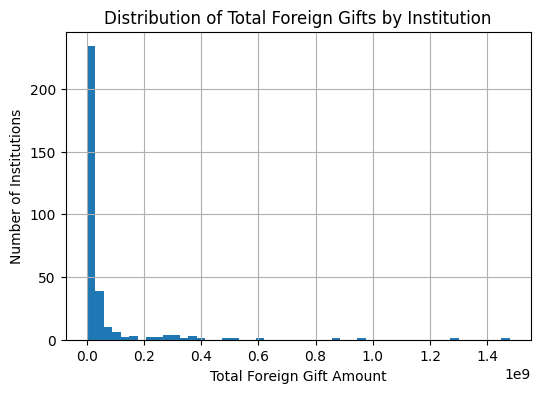

In [370]:
fg.groupby("Institution Name")["Foreign Gift Amount"] \
  .sum() \
  .hist(bins=50, figsize=(6,4))

plt.xlabel("Total Foreign Gift Amount")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Foreign Gifts by Institution")
plt.show()


A small number of institutions receive extremely large total amounts of foreign funding.
Most institutions receive much smaller totals, creating a highly unequal distribution.

In [371]:
fg.groupby("Giftor Name")["Foreign Gift Amount"] \
  .sum() \
  .sort_values(ascending=False) \
  .head(10)


,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


fg.groupby("Giftor Name")["Foreign Gift Amount"] \
  .sum() \
  .sort_values(ascending=False) \
  .head(10)


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [372]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cc = pd.read_csv("data/college_completion.csv")
cc.head()
cc.shape


(3798, 63)

The dataset contains 3,798 observations and 63 variables.

In [373]:
pd.crosstab(cc["control"], cc["level"])


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Public institutions are mostly 4-year schools, while for-profit institutions are more concentrated among 2-year programs.

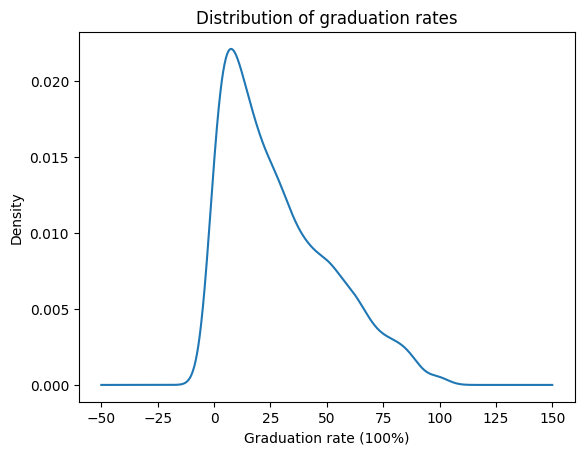

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


In [374]:
cc["grad_100_value"].plot(kind="kde")
plt.xlabel("Graduation rate (100%)")
plt.title("Distribution of graduation rates")
plt.show()

cc["grad_100_value"].describe()


Graduation rates vary widely, with a long right tail.

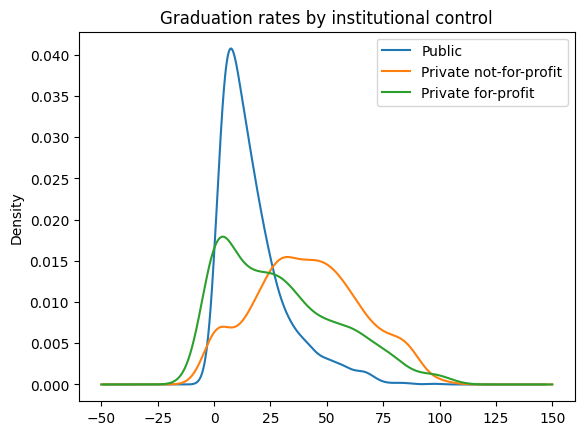

In [375]:
for c in cc["control"].dropna().unique():
    cc.loc[cc["control"] == c, "grad_100_value"].plot(kind="kde", label=c)

plt.legend()
plt.title("Graduation rates by institutional control")
plt.show()


Private non-profit institutions tend to have higher graduation rates than public and for-profit institutions.

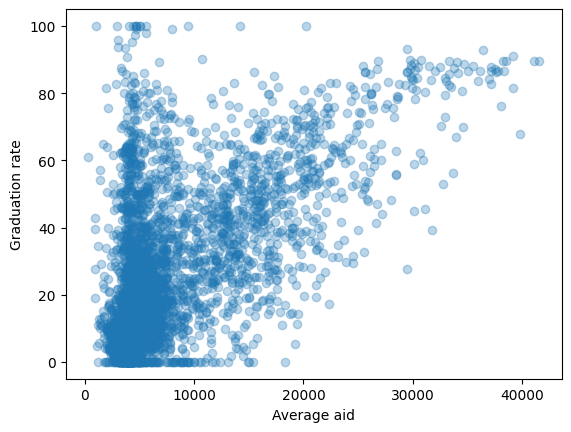

,aid_value,grad_100_value
aid_value,1.000000,0.575879
grad_100_value,0.575879,1.000000


In [376]:
plt.scatter(cc["aid_value"], cc["grad_100_value"], alpha=0.3)
plt.xlabel("Average aid")
plt.ylabel("Graduation rate")
plt.show()

cc[["aid_value", "grad_100_value"]].corr()


There is a weak positive relationship between aid and graduation rates.

In [377]:
cc.groupby("control")[["aid_value", "grad_100_value"]].corr()


aid_value  grad_100_value
control                                                         
Private for-profit     aid_value        1.000000        0.188363
                       grad_100_value   0.188363        1.000000
Private not-for-profit aid_value        1.000000        0.601591
                       grad_100_value   0.601591        1.000000
Public                 aid_value        1.000000        0.482481
                       grad_100_value   0.482481        1.000000

The positive relationship between aid and graduation rates is strongest for private non-profit institutions.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

## Q6. Properties of Linear Transformations

![Q6](Q6_linear_transform.jpg)

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [378]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ames = pd.read_csv("data/ames_prices.csv")
ames[["price", "Bldg.Type"]].head()


,price,Bldg.Type
0,215000,1Fam
1,105000,1Fam
2,172000,1Fam
3,244000,1Fam
4,189900,1Fam


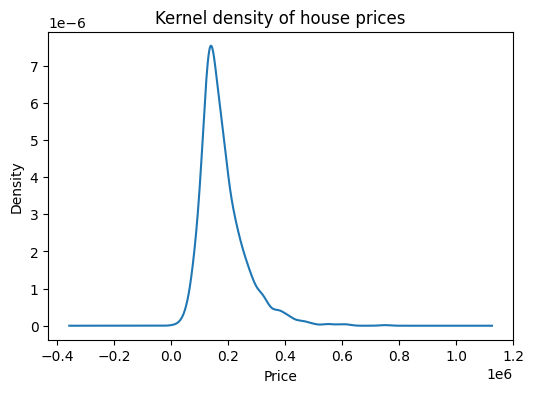

,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


In [379]:
ames["price"].plot(kind="kde", figsize=(6,4))
plt.xlabel("Price")
plt.title("Kernel density of house prices")
plt.show()

ames["price"].describe()


Price distribution is right-skewed

Most houses are clustered at lower prices with a long right tail

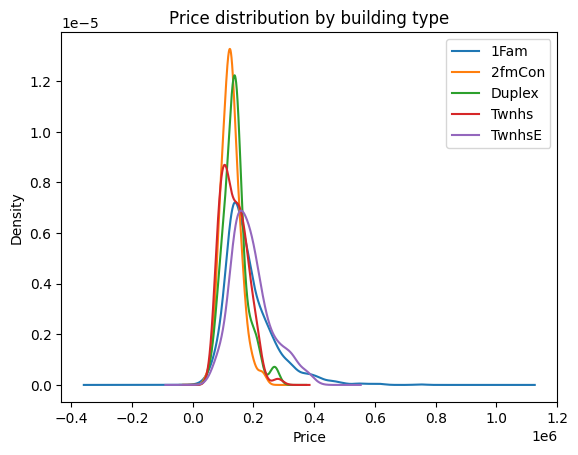

In [380]:
for btype, g in ames.groupby("Bldg.Type"):
    g["price"].plot(kind="kde", label=btype)

plt.legend()
plt.xlabel("Price")
plt.title("Price distribution by building type")
plt.show()


In [381]:
ames.groupby("Bldg.Type")["price"].describe()


,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


Single-family homes tend to be the most expensive on average

Some building types (e.g. duplex or townhouse) show lower average prices

Variance differs across building types

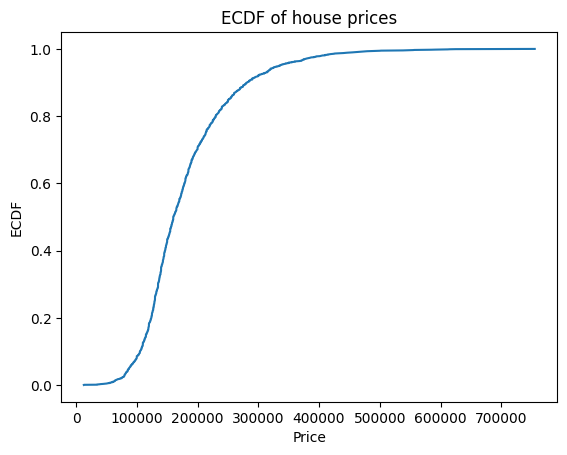

In [382]:
x = np.sort(ames["price"])
y = np.arange(1, len(x)+1) / len(x)

plt.plot(x, y)
plt.xlabel("Price")
plt.ylabel("ECDF")
plt.title("ECDF of house prices")
plt.show()


In [383]:
ames["price"].quantile([0, 0.25, 0.5, 0.75, 1])


,price
0.00,12789.0
0.25,129500.0
0.50,160000.0
0.75,213500.0
1.00,755000.0


ECDF shows most prices fall below the upper tail

Median is much lower than max, which confirms skewness

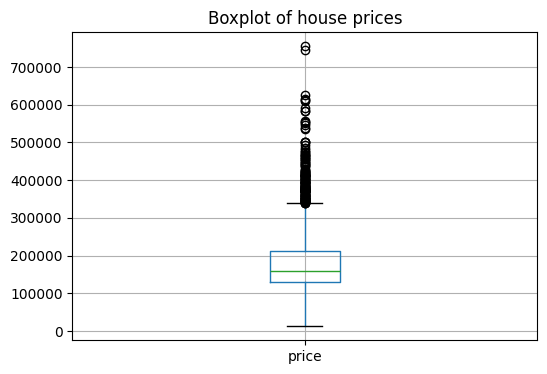

In [384]:
ames.boxplot(column="price", figsize=(6,4))
plt.title("Boxplot of house prices")
plt.show()


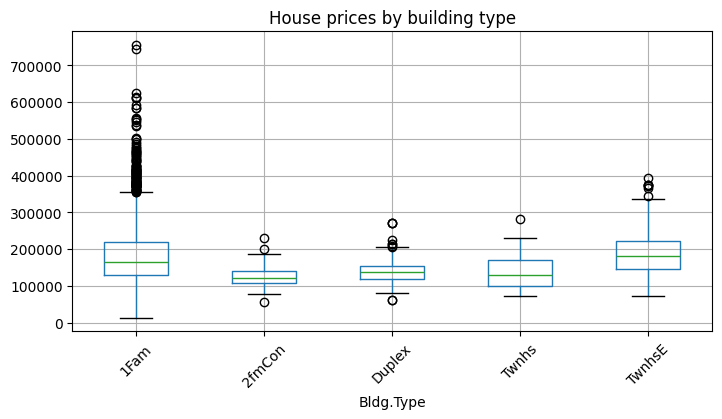

In [385]:
ames.boxplot(column="price", by="Bldg.Type", figsize=(8,4))
plt.xticks(rotation=45)
plt.title("House prices by building type")
plt.suptitle("")
plt.show()


Clear outliers in price

Outliers more common for single-family homes

In [386]:
Q1 = ames["price"].quantile(0.25)
Q3 = ames["price"].quantile(0.75)
IQR = Q3 - Q1

ames["outlier"] = (
    (ames["price"] < Q1 - 1.5 * IQR) |
    (ames["price"] > Q3 + 1.5 * IQR)
)

ames["outlier"].value_counts()


,count
outlier,
False,2793
True,137


In [387]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

ames["price_winsor"] = ames["price"].clip(lower, upper)


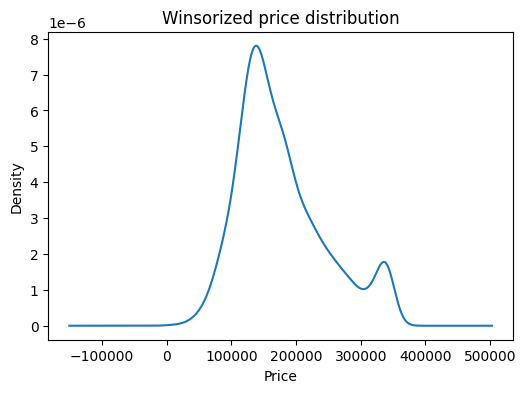

,price_winsor
count,2930.000000
mean,177082.283959
std,67906.837135
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,339500.000000


In [388]:
ames["price_winsor"].plot(kind="kde", figsize=(6,4))
plt.xlabel("Price")
plt.title("Winsorized price distribution")
plt.show()

ames["price_winsor"].describe()


Winsorization reduces the impact of extreme outliers

Distribution becomes less skewed

Mean and variance decrease compared to original prices